### 1. Imports

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
############### Caminho das Bases ###############
goals_scorers = 'https://raw.githubusercontent.com/ErikHenning927/project_modulo3/main/goalscorers.csv'
results = 'https://raw.githubusercontent.com/ErikHenning927/project_modulo3/main/results.csv'
shootouts = 'https://raw.githubusercontent.com/ErikHenning927/project_modulo3/main/shootouts.csv'

############### Lendo as Bases ###############

df_goals = pd.read_csv(goals_scorers)
df_results = pd.read_csv(results)
df_shootouts = pd.read_csv(shootouts)

In [212]:
print("Colunas do df_goals:")
print(df_goals.columns)

print("\nColunas do df_results:")
print(df_results.columns)

print("\nColunas do df_shootouts:")
print(df_shootouts.columns)

Colunas do df_goals:
Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

Colunas do df_results:
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

Colunas do df_shootouts:
Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')


### 2. Renomeando as colunas

In [214]:
df_goals.rename(columns={
    'date': 'Data',
    'home_team': 'time_casa',
    'away_team': 'time_visitante',
    'team': 'Time_marcador',
    'scorer': 'artilheiro',
    'minute': 'minuto',
    'own_goal': 'gol_contra',
    'penalty': 'penalti'
}, inplace=True)

df_results.rename(columns={
    'date': 'Data',
    'home_team': 'Time_casa',
    'away_team': 'Time_visitante',
    'home_score': 'Placar_TIMEcasa',
    'away_score': 'Placar_TIMEfora',
    'tournament': 'Torneio',
    'city': 'Cidade',
    'country': 'País',
    'neutral': 'Neutro'
 
}, inplace=True)
df_shootouts.rename(columns={
    'date': 'Data',
    'home_team': 'Time_casa',
    'away_team': 'Time_visitante',
    'winner': 'Vencedor',
    'first_shooter': 'Primeiro_Time_a_chutar_ao_Gol'
   
}, inplace=True)


In [215]:
## Função para verificar o formato de data de uma coluna
def verificar_formato_data(df, coluna):
    primeiros_valores = df[coluna].head().tolist()
    # Tenta inferir o formato da data com base nos primeiros valores
    formatos = ["%Y-%m-%d", "%d-%m-%Y", "%m-%d-%Y", "%Y/%m/%d", "%d/%m/%Y", "%m/%d/%Y"]
    for formato in formatos:
        try:
            pd.to_datetime(primeiros_valores, format=formato)
            return formato
        except ValueError:
            continue
    return "Formato não reconhecido"

# Verificar o formato de data para cada coluna
print("Formato de data para df_goals['data']: ", verificar_formato_data(df_goals, 'Data'))
print("Formato de data para df_results['Data']: ", verificar_formato_data(df_results, 'Data'))
print("Formato de data para df_shootouts['Data']: ", verificar_formato_data(df_shootouts, 'Data'))


Formato de data para df_goals['data']:  %Y-%m-%d
Formato de data para df_results['Data']:  %Y-%m-%d
Formato de data para df_shootouts['Data']:  %Y-%m-%d


### 2. Tratamento de Dados (Conversão para tipos adequados)

In [216]:
# Tratamento para a coluna 'data' em df_goals
df_goals['Data'] = pd.to_datetime(df_goals['Data'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# Tratamento para a coluna 'Data' em df_results
df_results['Data'] = pd.to_datetime(df_results['Data'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# Tratamento para a coluna 'Data' em df_shootouts
df_shootouts['Data'] = pd.to_datetime(df_shootouts['Data'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# Conversão da coluna 'minuto' para float em df_goals
df_goals['minuto'] = df_goals['minuto'].astype(float)

# Conversão das colunas 'Placar_TIMEcasa' e 'Placar_TIMEfora' para int em df_results
df_results['Placar_TIMEcasa'] = df_results['Placar_TIMEcasa'].astype(int)
df_results['Placar_TIMEfora'] = df_results['Placar_TIMEfora'].astype(int)

# Imprimir as colunas tratadas
print(df_goals['Data'])
print(df_results['Data'])


0        02-07-1916
1        02-07-1916
2        02-07-1916
3        02-07-1916
4        06-07-1916
            ...    
44105    10-02-2024
44106    10-02-2024
44107    11-02-2024
44108    11-02-2024
44109    11-02-2024
Name: Data, Length: 44110, dtype: object
0        30-11-1872
1        08-03-1873
2        07-03-1874
3        06-03-1875
4        04-03-1876
            ...    
46284    07-02-2024
46285    07-02-2024
46286    10-02-2024
46287    10-02-2024
46288    11-02-2024
Name: Data, Length: 46289, dtype: object


### 3. Tratamento de Dados (removendo duplicados e NaN)

In [217]:
df_goals.dropna(inplace=True)
df_results.dropna(inplace=True)
df_shootouts.dropna(inplace=True)


df_goals.drop_duplicates(inplace=True)
df_results.drop_duplicates(inplace=True)
df_shootouts.drop_duplicates(inplace=True)


In [218]:
df_results[df_results['Placar_TIMEcasa'] == df_results['Placar_TIMEfora']].shape[0]

10555

In [359]:
##Dataframe tratado
df_goals.head(3)

,Data,time_casa,time_visitante,Time_marcador,artilheiro,minuto,gol_contra,penalti
0,02-07-1916,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,02-07-1916,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,02-07-1916,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False


In [220]:
##Dataframe tratado
df_results.head(3)

,Data,Time_casa,Time_visitante,Placar_TIMEcasa,Placar_TIMEfora,Torneio,Cidade,País,Neutro
0,30-11-1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,08-03-1873,England,Scotland,4,2,Friendly,London,England,False
2,07-03-1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [222]:
##Dataframe tratado
df_shootouts.head(3)

,Data,Time_casa,Time_visitante,Vencedor,Primeiro_Time_a_chutar_ao_Gol
26,20-06-1976,Czechoslovakia,Germany,Czechoslovakia,Czechoslovakia
36,22-05-1979,Argentina,Netherlands,Argentina,Argentina
40,21-06-1980,Italy,Czechoslovakia,Czechoslovakia,Italy


## Levantamento de Inferências com base nos Dados:

**Questões:**

1. Qual é a média de gols marcados por jogo?

2. Quem são os 5 maiores artilheiros e quantos gols cada um marcou?

3. Qual país sediou o maior número de partidas?

4. Qual o desempenho médio de gols do Brasil em casa e fora nos últimos 5 anos.

5. Qual a correlação entre a equipe que inicia marcando e a probabilidade de vencer a partida?

6. Saldo da Seleção Brasileira em Copas do Mundo.


>### Qual é a média de gols marcados por jogo?

In [223]:
df_results

,Data,Time_casa,Time_visitante,Placar_TIMEcasa,Placar_TIMEfora,Torneio,Cidade,País,Neutro
0,30-11-1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,08-03-1873,England,Scotland,4,2,Friendly,London,England,False
2,07-03-1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,06-03-1875,England,Scotland,2,2,Friendly,London,England,False
4,04-03-1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
46284,07-02-2024,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
46285,07-02-2024,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
46286,10-02-2024,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
46287,10-02-2024,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True


In [355]:
media_placar = np.mean((df_results['Placar_TIMEcasa'] + df_results['Placar_TIMEfora']) / 2)
media_placar

1.4685454427617792

> Ou seja, sabendo que temos uma quantidade de 46.289 resultados registrados, e somadas os gols fora e em casa temos uma média de aproximadamente ± 1 gol por jogo (1.46).


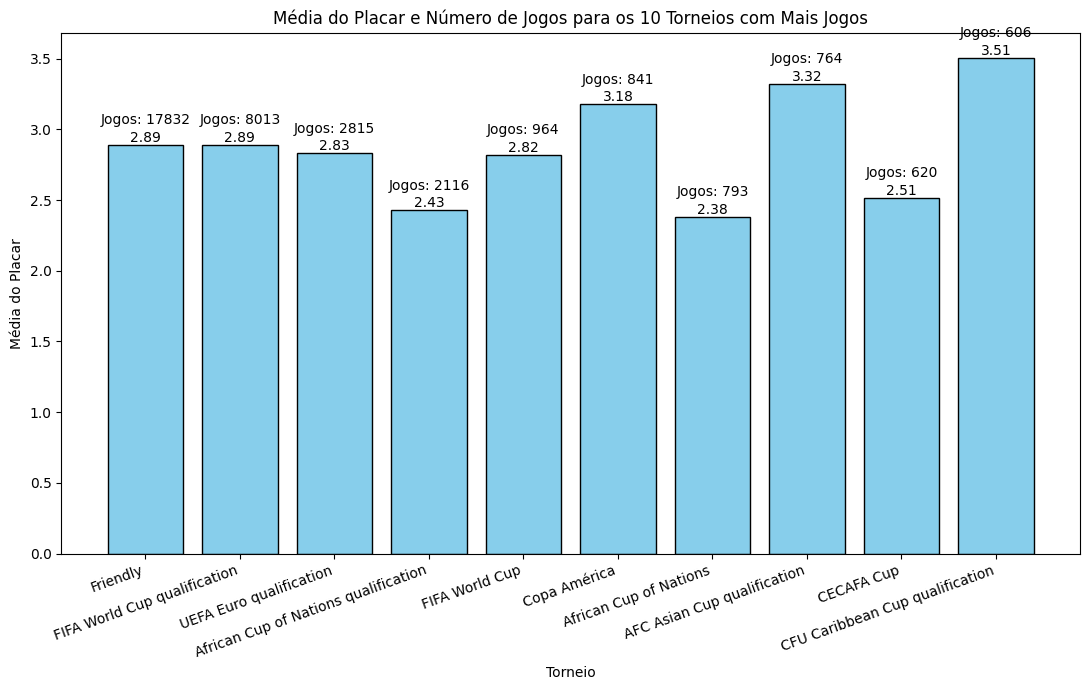

In [388]:
###Criando o gráfico de média, utilizando dessa vez a média dos dez maiores Torneios.
num_jogos_por_torneio = df_results['Torneio'].value_counts()
top_10_torneios = num_jogos_por_torneio.nlargest(10).index # 10 torneios com mais jogos

# Calcular a média do placar para cada torneio
media_placar_por_torneio = df_results.groupby('Torneio')[['Placar_TIMEcasa', 'Placar_TIMEfora']].mean().sum(axis=1).loc[top_10_torneios]

# Criar o gráfico de barras
plt.figure(figsize=(11, 7))
bars = plt.bar(media_placar_por_torneio.index, media_placar_por_torneio, color='skyblue', edgecolor='black')

for i, torneio in enumerate(top_10_torneios):
    plt.text(i, media_placar_por_torneio[torneio] + 0.05 * np.max(media_placar_por_torneio),
             f'Jogos: {num_jogos_por_torneio[torneio]}', ha='center', va='center', color='black')
    

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom')

plt.xticks(rotation=20, ha='right')

plt.title('Média do Placar e Número de Jogos para os 10 Torneios com Mais Jogos')
plt.xlabel('Torneio')
plt.ylabel('Média do Placar')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


>### Quais são os 5 maiores marcadores e qual seu país de vínculo?

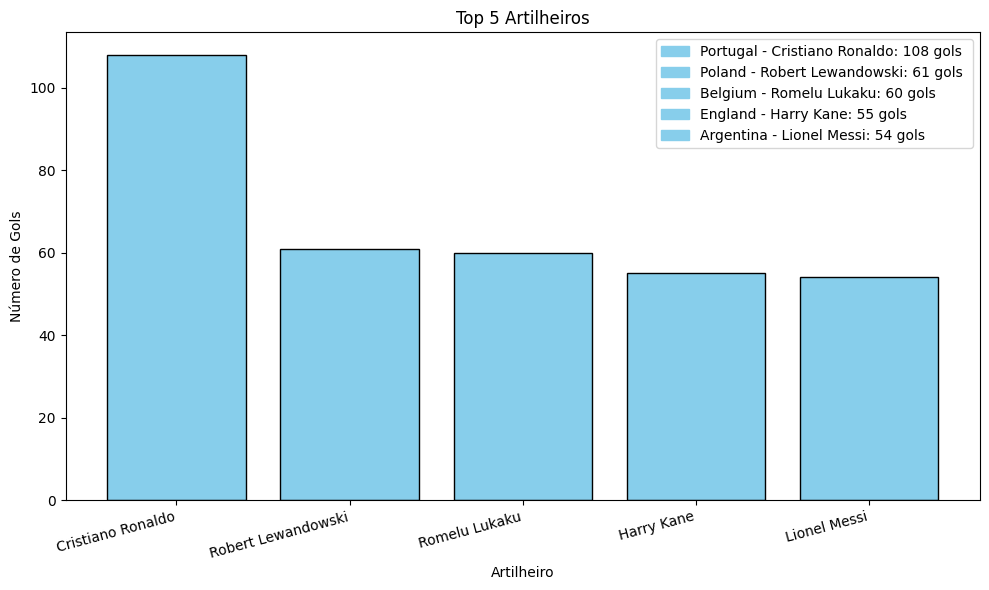

In [416]:

top_5_artilheiros = df_goals.groupby(['artilheiro', 'Time_marcador']).size().nlargest(5)
top_5_artilheiros = top_5_artilheiros.reset_index(name='gols marcados')

plt.figure(figsize=(10, 6)) #Criação do grafico
plt.bar(top_5_artilheiros['artilheiro'], top_5_artilheiros['gols marcados'], color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Top 5 Artilheiros')
plt.xlabel('Artilheiro')
plt.ylabel('Número de Gols')

# Criar a legenda com os valores representando o total de gols de cada jogador
legend_handles = []
for index, row in top_5_artilheiros.iterrows():
    legend_handles.append(plt.Rectangle((0,0),1,1, color='skyblue', label=f'{row["Time_marcador"]} - {row["artilheiro"]}: {row["gols marcados"]} gols '))

# Adicionar a legenda ao gráfico
plt.legend(handles=legend_handles, loc='upper right')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=15, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()






> O maior marcador é Cristiano Ronaldo, o português acumula 108 gols.


>### Qual País sediou mais partidas?

In [358]:
counts = df_results['País'].value_counts()
idx = np.argmax(counts)
total_partidas = counts.iloc[idx]

print(f"O país com o maior número de partidas é: {counts.index[idx]}, com um total de {total_partidas} partidas.")


O país com o maior número de partidas é: United States, com um total de 1339 partidas.


> O país com o maior número de partidas é: United States, com um total de 1339 partidas.


>### Qual o desempenho do brasil em casa e fora nos últimos 5 anos?

In [428]:
# Definir a data atual
from datetime import datetime, timedelta
data_atual = datetime.now()
intervalo = data_atual - timedelta(days=365*5) #5 anos

jogoscasa_brasil = df_results[df_results['Time_casa'] == 'Brazil']
# Filtrar com base no intervalo.
jogosbrasil = jogoscasa_brasil[pd.to_datetime(jogoscasa_brasil['Data'], format='%d-%m-%Y').dt.year >= intervalo.year]

# Calcular a média de gols marcados | casa
avg_goals_casa = jogosbrasil.groupby('Data')['Placar_TIMEcasa'].mean()



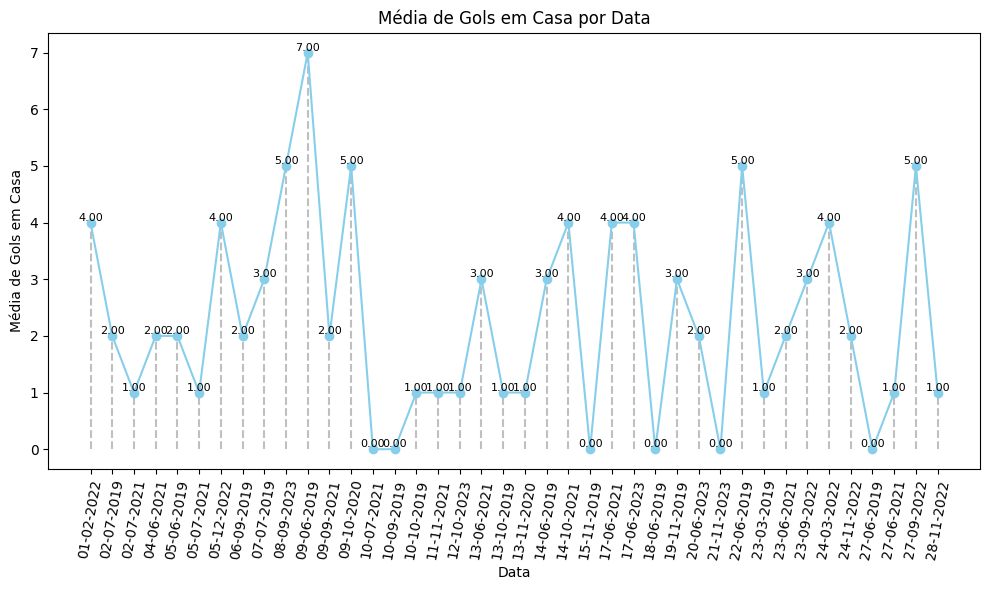

In [445]:

plt.figure(figsize=(10, 6))

for i in range(len(avg_goals_casa)): # linha tracejada
    plt.vlines(avg_goals_casa.index[i], 0, avg_goals_casa.values[i], color='gray', linestyle='--', alpha=0.5)

plt.plot(avg_goals_casa.index, avg_goals_casa.values, color='skyblue', marker='o', linestyle='-')

# exibir o valor da media no topo de cada bar
for i, value in enumerate(avg_goals_casa.values):
    plt.text(avg_goals_casa.index[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Média de Gols em Casa por Data')
plt.xlabel('Data')
plt.ylabel('Média de Gols em Casa')

# Mostrar o gráfico
plt.xticks(fontsize=10, rotation=80)
plt.tight_layout()
plt.show()

In [229]:
# Definir a data atual
jogosfora_brasil = df_results[df_results['Time_visitante'] == 'Brazil']
# Filtrar com base no intervalo.
jogosbrasil = jogosfora_brasil[pd.to_datetime(jogosfora_brasil['Data'], format='%d-%m-%Y').dt.year >= intervalo.year]

# Calcular a média de gols marcados | casa
avg_goals_fora = jogosbrasil.groupby('Data')['Placar_TIMEfora'].mean()



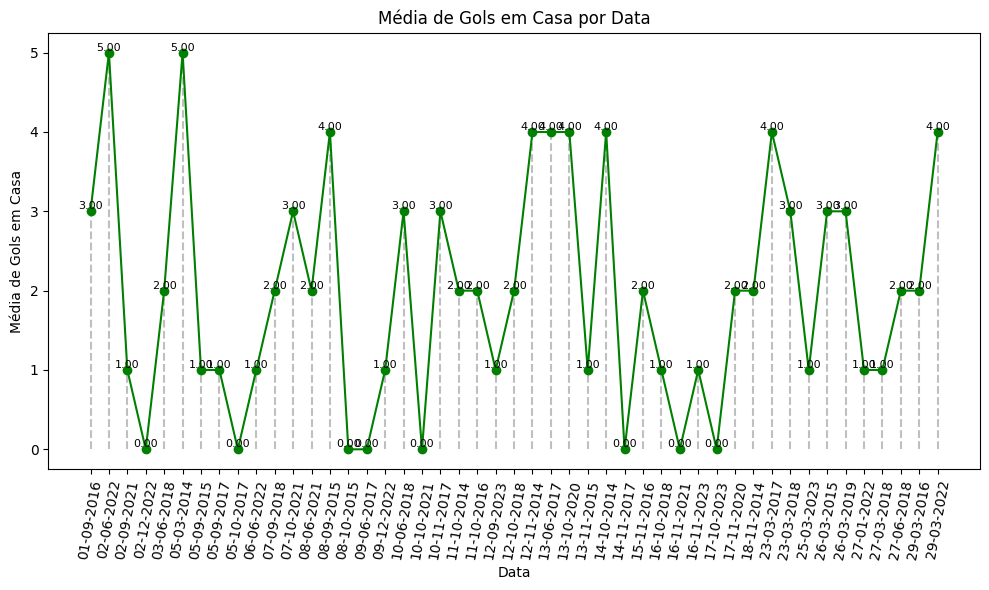

In [446]:
plt.figure(figsize=(10, 6))

for i in range(len(avg_goals_fora)): # linha tracejada
    plt.vlines(avg_goals_fora.index[i], 0, avg_goals_fora.values[i], color='gray', linestyle='--', alpha=0.5)

plt.plot(avg_goals_fora.index, avg_goals_fora.values, color='green', marker='o', linestyle='-')

# exibir o valor da media no topo de cada bar
for i, value in enumerate(avg_goals_fora.values):
    plt.text(avg_goals_fora.index[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Média de Gols em Casa por Data')
plt.xlabel('Data')
plt.ylabel('Média de Gols em Casa')

# Mostrar o gráfico
plt.xticks(fontsize=10, rotation=80)
plt.tight_layout()
plt.show()

>### Qual a correlação entre a equipe que inicia marcando e a probabilidade de vencer a partida?

In [231]:
first_shooter_counts = df_goals['Time_marcador'].value_counts()

vitoria_por_primeiro_marcador = df_shootouts.groupby('Primeiro_Time_a_chutar_ao_Gol')['Vencedor'].apply(lambda x: (x == x.name).mean())
# Calcular a correlação em porcentagem entre a contagem de primeiros chutes e a probabilidade de vitória
correlacao = first_shooter_counts.corr(vitoria_por_primeiro_marcador) * 100
print(f"Correlação entre o primeiro time a marcar e a probabilidade de vencer: {correlacao:.2f}%")

Correlação entre o primeiro time a marcar e a probabilidade de vencer: 6.31%


## Saldo de Gols da Seleção Brasileira em Copas do Mundo

In [248]:
copa_do_mundo = df_results[df_results['Torneio'] == 'FIFA World Cup'].copy()
copa_do_mundo.loc[:, 'Data'] = pd.to_datetime(copa_do_mundo['Data'], dayfirst=True).dt.year

copa_do_mundo


,Data,Time_casa,Time_visitante,Placar_TIMEcasa,Placar_TIMEfora,Torneio,Cidade,País,Neutro
1407,1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1408,1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1409,1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1410,1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1411,1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
45145,2022,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
45147,2022,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
45148,2022,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
45152,2022,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


>##### É necessário renomear as colunas para que seus resultados em jogos em casa e fora sejam concatenados. O Axis = 0 está organizando os resultados por colunas.

In [331]:
placar_casa = copa_do_mundo[['Time_casa', 'Placar_TIMEcasa', 'Data']].rename({'Time_casa':'selecao', 'Placar_TIMEcasa':'placar', 'Data':'ano'}, axis='columns')
placar_fora = copa_do_mundo[['Time_visitante', 'Placar_TIMEfora', 'Data']].rename({'Time_visitante':'selecao', 'Placar_TIMEfora':'placar', 'Data':'ano'}, axis='columns')

placar_fora

,selecao,placar,ano
1407,United States,3,1930
1408,Mexico,1,1930
1409,Yugoslavia,2,1930
1410,Romania,3,1930
1411,France,0,1930
...,...,...,...
45145,France,2,2022
45147,Croatia,0,2022
45148,Morocco,0,2022
45152,Morocco,1,2022


In [332]:
placar_casa

,selecao,placar,ano
1407,Belgium,0,1930
1408,France,4,1930
1409,Brazil,1,1930
1410,Peru,1,1930
1411,Argentina,1,1930
...,...,...,...
45145,England,1,2022
45147,Argentina,3,2022
45148,France,2,2022
45152,Croatia,2,2022


In [333]:
#Juntar as duas variáveis que contém os placares

saldo_gols = pd.concat([placar_casa, placar_fora]).reset_index(drop=True).fillna(0)

saldo_gols

C:\Users\Remya\AppData\Local\Temp\ipykernel_5952\317710767.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  saldo_gols = pd.concat([placar_casa, placar_fora]).reset_index(drop=True).fillna(0)


,selecao,placar,ano
0,Belgium,0,1930
1,France,4,1930
2,Brazil,1,1930
3,Peru,1,1930
4,Argentina,1,1930
...,...,...,...
1923,France,2,2022
1924,Croatia,0,2022
1925,Morocco,0,2022
1926,Morocco,1,2022


In [450]:
saldo_acumulado = saldo_gols.groupby(['selecao', 'ano'])['placar'].sum().unstack(fill_value=0)
saldo_acumulado['Histórico de gols'] = saldo_acumulado.sum(axis=1)
saldo_acumulado = saldo_acumulado.sort_values(by='Histórico de gols', ascending=False)

saldo_acumulado


ano,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1990,1994,1998,2002,2006,2010,2014,2018,2022,Histórico de gols
selecao,,,,,,,,,,,,,,,,,,,,,
Brazil,5,1,14,22,8,16,14,4,19,6,...,4,11,14,18,10,9,11,8,8,237
Germany,0,11,3,0,25,12,4,15,17,13,...,15,9,8,14,14,16,18,2,6,232
Argentina,18,2,0,0,0,5,2,4,0,9,...,5,8,10,2,11,10,8,6,15,152
France,4,2,4,0,3,23,0,2,0,0,...,0,0,15,0,9,1,10,14,16,136
Italy,0,12,11,4,6,0,3,2,10,5,...,10,8,8,5,12,4,2,0,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Salvador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DR Congo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trinidad and Tobago,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
